### Importing Packages

In [1]:
##Main libraries
import pandas as pd
import numpy as np

##Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.colors as pc


##Libraries to Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Clustering model
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Import and Load Data

In [2]:
#Read data
df = pd.read_csv('C:/Users/ostab/Downloads/Mall-Customers-Segmentation/Mall_Customers_Data.csv')
df.head(10)##Take sample from data

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72

In [3]:
#Show the num. of cols and rows
df.shape

(200, 5)

In [4]:
#Rename 'Annual Income' and 'Spending Score' columns
df=df.rename(columns={"Annual Income (k$)": "Annual_Income_$", "Spending Score (1-100)": "Spending_Score"})

In [5]:
#Some information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       200 non-null    int64 
 1   Genre            200 non-null    object
 2   Age              200 non-null    int64 
 3   Annual_Income_$  200 non-null    int64 
 4   Spending_Score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#Statistics information about Data, include numerical columns
df.describe()

CustomerID         Age  Annual_Income_$  Spending_Score
count  200.000000  200.000000       200.000000      200.000000
mean   100.500000   38.850000        60.560000       50.200000
std     57.879185   13.969007        26.264721       25.823522
min      1.000000   18.000000        15.000000        1.000000
25%     50.750000   28.750000        41.500000       34.750000
50%    100.500000   36.000000        61.500000       50.000000
75%    150.250000   49.000000        78.000000       73.000000
max    200.000000   70.000000       137.000000       99.000000

In [8]:
#Statistics information about Data, include categorical columns
df.describe(exclude='number')

Genre
count      200
unique       2
top     Female
freq       112

In [9]:
#Check missing values
df.isna().any() 


CustomerID         False
Genre              False
Age                False
Annual_Income_$    False
Spending_Score     False
dtype: bool

In [10]:
#Check duplicated values in data
df.duplicated().any() 

False

In [11]:
numerical_columns = df.select_dtypes(include="number").columns.to_list() ## select numerical cols 
categorical_columns = df.select_dtypes(exclude="number").columns.to_list()

print(f"numerical columns in data is : {numerical_columns}")
print("*"*90)
print(f"categorical columns in data is : {categorical_columns}")

numerical columns in data is : ['CustomerID', 'Age', 'Annual_Income_$', 'Spending_Score']
******************************************************************************************
categorical columns in data is : ['Genre']


**The Data have 200 rows and 5 columns.**

**No Missing Values in Data.**

**No Duplicate Values in Data.**



# Exploratory Data Analysis EDA

### Uni-variate Analysis

#### Analysis of Customer Age

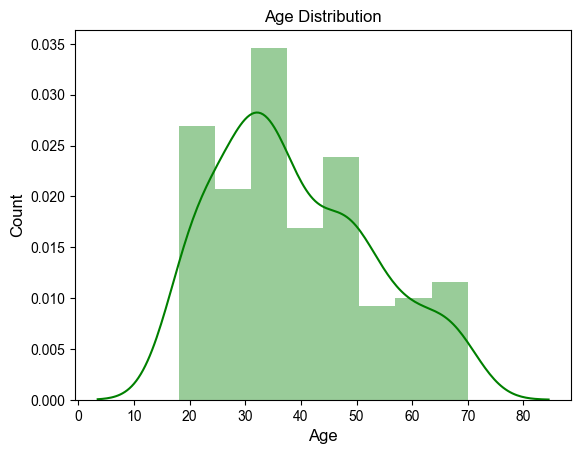

In [12]:
fig= sns.distplot(df['Age'], color= 'green')
fig.set_xlabel("Age", fontsize=12)
fig.set_ylabel("Count", fontsize=12)
fig.set_title("Age Distribution", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

#### Analysis of customer's Annual Income

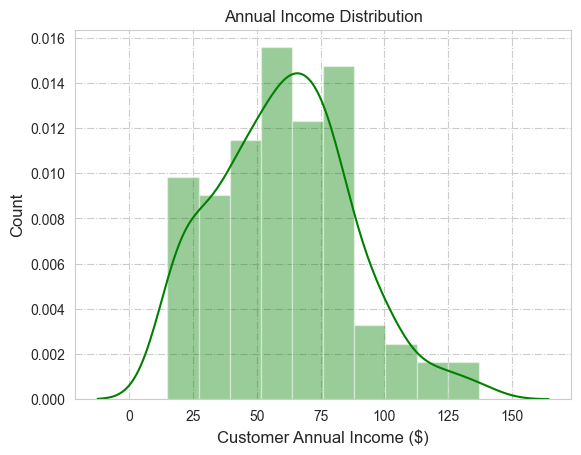

In [13]:
fig=sns.distplot(df['Annual_Income_$'], color = 'green')
fig.set_xlabel("Customer Annual Income ($)", fontsize=12)
fig.set_ylabel("Count", fontsize=12)
fig.set_title("Annual Income Distribution", fontsize=12)
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

####  Analysis of customer's Spending Score

In [14]:
# Define a color scale from the color library
color_scale = pc.qualitative.Bold

# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("KDE Plot", "Box Plot"))

# Create KDE Plot (left subplot)
kde_trace = go.Histogram(
    x=df['Spending_Score'],
    name="KDE",
    histnorm='probability density',
    marker=dict(color=color_scale[1]),
    opacity=0.7,
)
fig.add_trace(kde_trace, row=1, col=1)

# Create Box Plot (right subplot)
box_trace = go.Box(
    y=df['Spending_Score'],
    name="Box Plot",
    marker=dict(color=color_scale[3]),
)
fig.add_trace(box_trace, row=1, col=2)

# Update layout and labels
fig.update_layout(
    title="Spending Score Distribution (KDE and Box Plot)",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="gray",
)

# Show the subplot
fig.show()

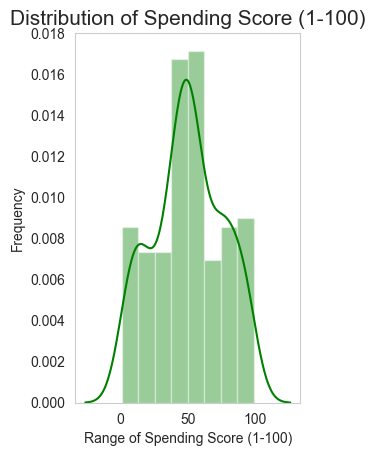

In [15]:
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Spending_Score'], color = 'green')
plt.title('Distribution of Spending Score (1-100)', fontsize = 15)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

#### Analysis of Customer's Gender

In [16]:
gender_count = df["Genre"].value_counts(normalize=True)
gender_count.to_frame()

proportion
Genre             
Female        0.56
Male          0.44

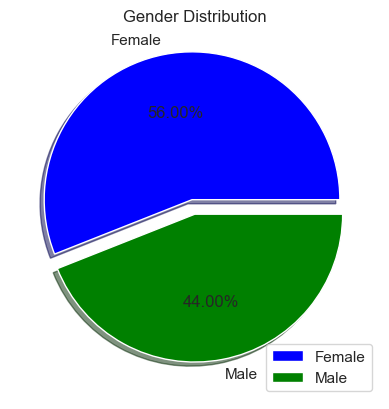

In [17]:
## colors for each gender category
colors = ['blue', 'green']

## explode values to emphasize a specific section
explode = (0.1, 0)

## labels and autopct to show percentage with two decimal places
labels = gender_count.index
autopct = '%.2f%%'

plt.pie(x=gender_count.values, 
        labels=labels,
        colors=colors,
        explode=explode,
        autopct=autopct,
        shadow=True)

# title to the chart
plt.title("Gender Distribution")

# Add a legend
plt.legend(loc='best')

plt.show()

## Multivariate Analysis

#### Scatter matrix to visualize pairwise relationships between all numeric variables (age, income, spending score).

In [18]:
# Create a custom color scale
custom_color_scale = px.colors.qualitative.Bold

# Create a pair plot using Plotly Express with the custom color scale
fig = px.scatter_matrix(
    df,
    dimensions=["Annual_Income_$", "Spending_Score", "Age"],
    color="Genre",
    title="Pair Plot of Annual Income, Spending Score, and Age of Customers",
    symbol="Genre",
    labels={"Annual_Income_$": "Annual Income", "Spending_Score": "Spending Score"},
    color_discrete_map={category: color for category, color in zip(df['Genre'].unique(), custom_color_scale)}
)

# Update the layout
fig.update_layout(
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
    title_x=0.5,  # Center the title
    showlegend=True,  # Show legend
)

# Show the pair plot
fig.show()

#### Compare the spending scores of male and female customers.

In [19]:
# Create a box plot for Spending Score by Gender
fig = px.box(
    df,
    x="Genre",
    y="Spending_Score",
    title=("<b> Spending Score Distribution by Gender"),
    color="Genre",
    color_discrete_sequence=color_scale,
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Spending Score",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the box plot
fig.show()

In [20]:
## C
fig = px.histogram(data_frame=df, x="Spending_Score", color="Genre",
                color_discrete_sequence=px.colors.qualitative.Bold, 
                  title="<b> Spending Score Distribution.")

# Customize the appearance
fig.update_layout(
    xaxis_title="Customer Spending Score",
    yaxis_title="Count",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the box plot
fig.show()


#### Examine how age relates to spending.

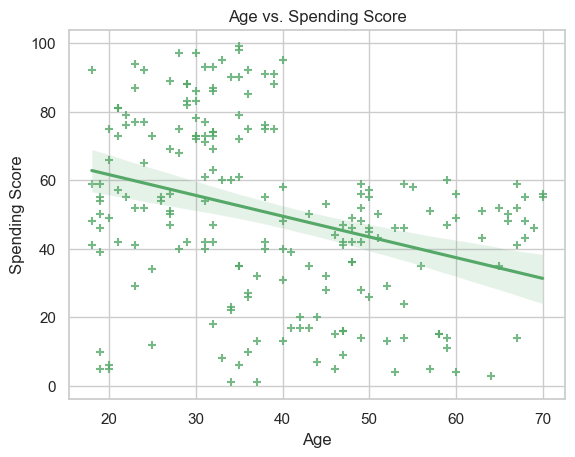

In [21]:
sns.regplot(x='Age', y='Spending_Score', data=df, color='g', marker='+')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs. Spending Score')
plt.show()

#### Examine how age relates to spending and Gender

In [22]:
fig = px.scatter(df, x="Age", y="Spending_Score",title="Age vs. Spending Score with Fit Line",
    color=df['Genre'], hover_name="Age",  # Show age in hover tooltip
    trendline="ols", color_discrete_sequence=px.colors.qualitative.Bold )


# Customize the appearance
fig.update_layout(
    xaxis_title="Customer Spending Score",
    yaxis_title="Count",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white")


fig.show()

#### Examine how age relates to Annual Income and Gender

In [23]:
# Create a scatter plot for Income vs. Age with a fit line
fig = px.scatter(
    df,
    x="Annual_Income_$",
    y="Age",
    title="Income vs. Age with Fit Line",
    color=df['Genre'],
    hover_name="Age",  # Show age in hover tooltip
    trendline="ols",  # Add an ordinary least squares (OLS) regression fit line
    color_discrete_sequence=px.colors.qualitative.Bold
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Annual Income (k$)",
    yaxis_title="Age",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the scatter plot with the fit line
fig.show()

#### Examine how Spending Score relates to Annual Income and Gender

In [24]:
# Create a scatter plot for Income vs. Age with a fit line
fig = px.scatter(
    df,
    x="Annual_Income_$",
    y="Spending_Score",
    title="Income vs. Age with Fit Line",
    color=df['Genre'],
    hover_name="Age",  # Show age in hover tooltip
    color_discrete_sequence=px.colors.qualitative.Bold

)

# Customize the appearance
fig.update_layout(
    xaxis_title="Annual Income (k$)",
    yaxis_title="Spending Score",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the scatter plot with the fit line
fig.show()

#### Compare the distribution of annual incomes between male and female customers.

In [25]:
# Create a bar plot for Income by Gender
fig = px.bar(
    df,
    x="Genre",
    y="Annual_Income_$",
    title=("Income by Gender"),
    color="Genre",
    color_discrete_sequence=color_scale,
)

# Customize the appearance
fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Annual Income (k$)",
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgrey",
    plot_bgcolor="white",
)

# Show the bar plot
fig.show()

#### Analyze how spending scores vary across different age groups (e.g., young adults, middle-aged, and senior citizens).

In [26]:
# Define age group bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ["0-20", "21-30", "31-40", "41-50", "51-60", "61+"]

# Create a new column 'Age Group' based on age bins and labels
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by age group and count the number of customers in each group
age_group_counts = df['Age Group'].value_counts().reset_index()
age_group_counts.columns = ['Age Group', 'Count']

# Create a bar plot for age group analysis
fig = px.bar(
    age_group_counts,
    x='Age Group',
    y='Count',
    title='Age Group Analysis',
    labels={'Count': 'Number of Customers'},
    color_discrete_sequence=px.colors.qualitative.Bold,  # Customize the color
)

# Customize the appearance
fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Number of Customers',
    font=dict(size=14, color="black"),
    paper_bgcolor="lightgray",
    plot_bgcolor="white",
)

# Show the bar plot
fig.show()

### Analize Correlation Matrix

In [27]:
corr_matrix = round(df[numerical_columns].corr(),2)
corr_matrix

CustomerID   Age  Annual_Income_$  Spending_Score
CustomerID             1.00 -0.03             0.98            0.01
Age                   -0.03  1.00            -0.01           -0.33
Annual_Income_$        0.98 -0.01             1.00            0.01
Spending_Score         0.01 -0.33             0.01            1.00

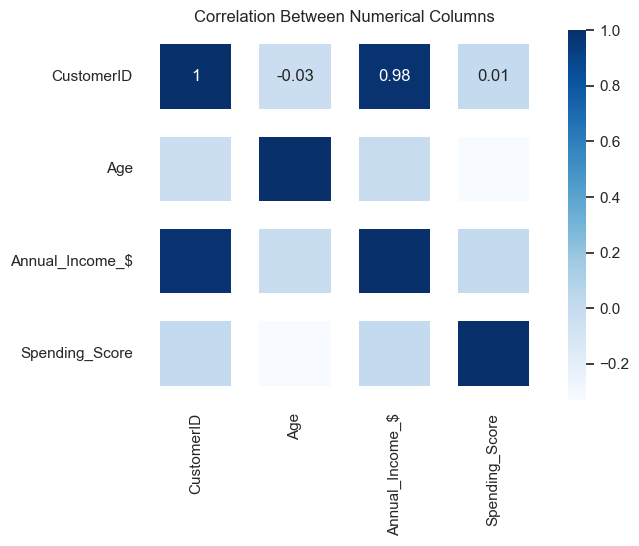

In [28]:
sns.heatmap(corr_matrix, annot=True, cmap="Blues",cbar=True, linewidths=20)
plt.title("Correlation between numerical columns".title())
plt.show()


Annual income and age no correlation
between Age and spending negative correlation

# Clustering Model

### K-means Clustering

#### Using the elbow method to find the optimal number of clusters

In [29]:
#Select the features to clister (Annual Income and Spending Score)
X = df.iloc[:, [3,4]].values

In [30]:
# Standardize the data (recommended for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Initialize a list to store the WCSS values
wcss=[]

# Try different values of K (from 1 to 10) and calculate WCSS for each K
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    

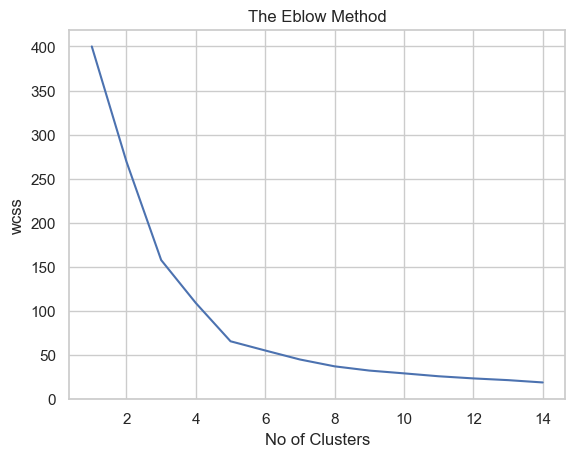

In [32]:
# Plot the Elbow Method graph
plt.plot(range(1,15), wcss )
plt.title('The Eblow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [33]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,15),wcss,curve = 'convex', direction = 'decreasing')
elbow_point = kneedle.elbow
elbow_point

5

#### Training the K-Means model on the dataset and calculate Silhouette coefficient

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
kmeansmodel = KMeans(n_clusters = elbow_point, init = 'k-means++' , random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)
print(silhouette_score(X, kmeansmodel.labels_, metric='euclidean'))

0.553931997444648


#### Choose the optimal value of k for silhouete score


In [36]:
k_choose = np.arange(2, 12, 1)

k_with_score = {}
for k in k_choose:
    each_kmeans = KMeans(n_clusters=k, n_init=10, random_state=45)
    each_kmeans.fit(X)
    
    ## Get score
    k_with_score[k] = silhouette_score(X, each_kmeans.labels_)

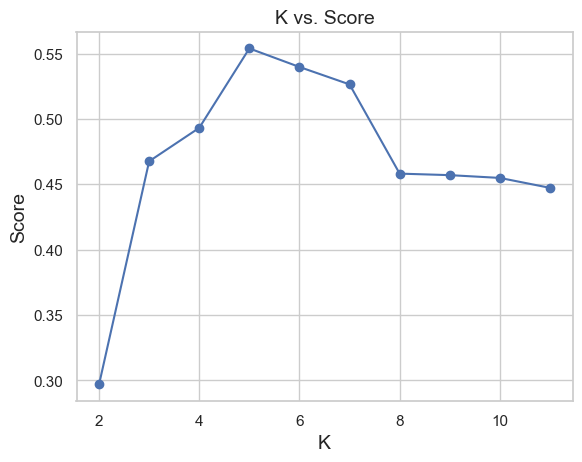

In [37]:
## Draw to get the best value for k 
plt.plot(k_with_score.keys(), k_with_score.values(), 'bo-')
plt.title('K vs. Score', fontsize=14)
plt.xlabel('K', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.show()   ## optimal according to silhouete score is also 5

*Optimal number of clusters according to elbow method is k=5
*Optimal number of clusters according to silhouete score is also 5

#### Visualising the clusters

In [39]:
kmeans = pd.DataFrame(y_kmeans)
dataset_1 = pd.concat([df,kmeans],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

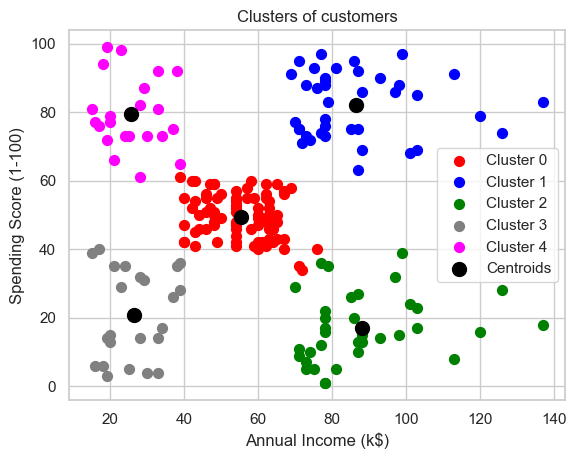

In [40]:
plt1.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 0')
plt1.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 1')
plt1.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 2')
plt1.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'grey', label = 'Cluster 3')
plt1.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 4')
plt1.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt1.title('Clusters of customers')
plt1.xlabel('Annual Income (k$)')
plt1.ylabel('Spending Score (1-100)')
plt1.legend()
plt1.show



In [48]:
labels = kmeansmodel.labels_
b = df.copy()
b['Cluster'] = labels
b.head()

CustomerID   Genre  Age  Annual_Income_$  Spending_Score Age Group  Cluster
0           1    Male   19               15              39      0-20        3
1           2    Male   21               15              81     21-30        4
2           3  Female   20               16               6     21-30        3
3           4  Female   23               16              77     21-30        4
4           5  Female   31               17              40     31-40        3

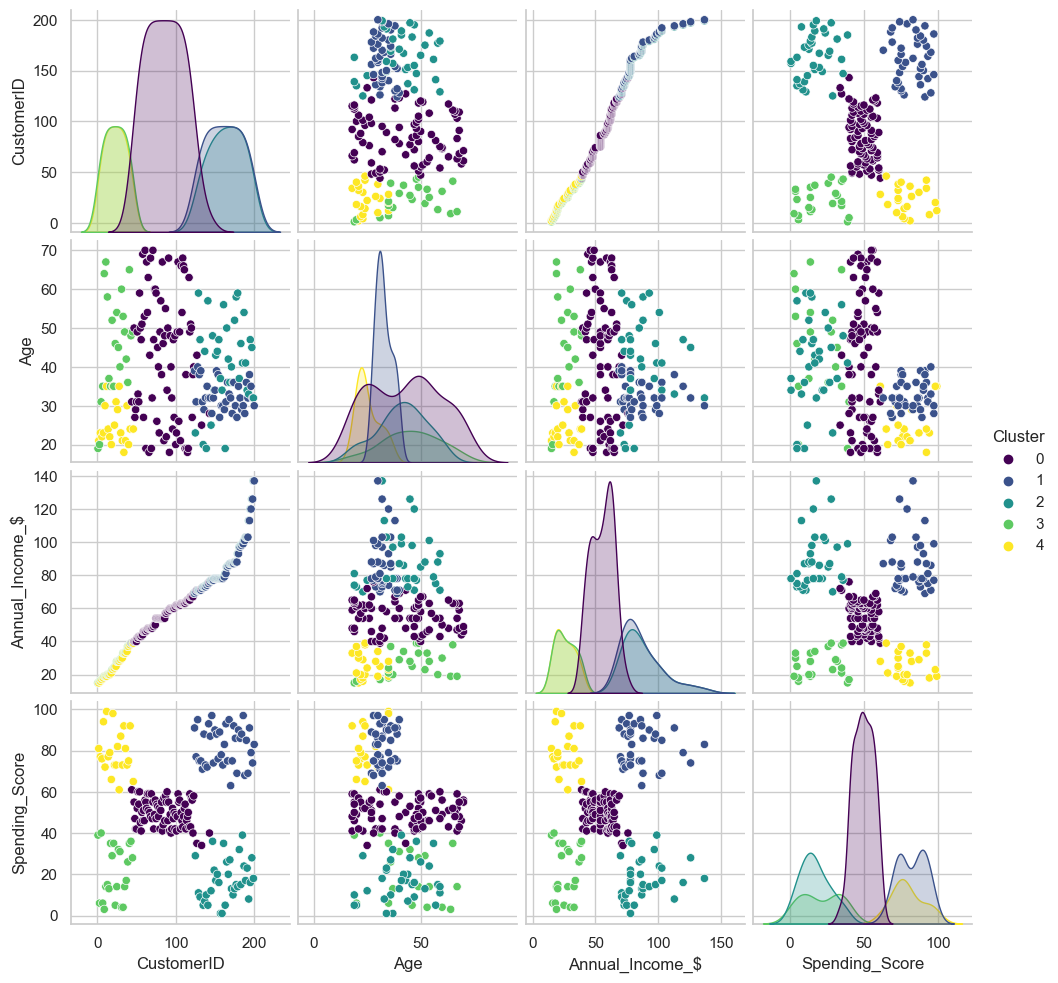

In [49]:
sns.pairplot(b,hue='Cluster',palette='viridis')

### Hierarchical Clustering

Text(0, 0.5, 'Euclidean distances')

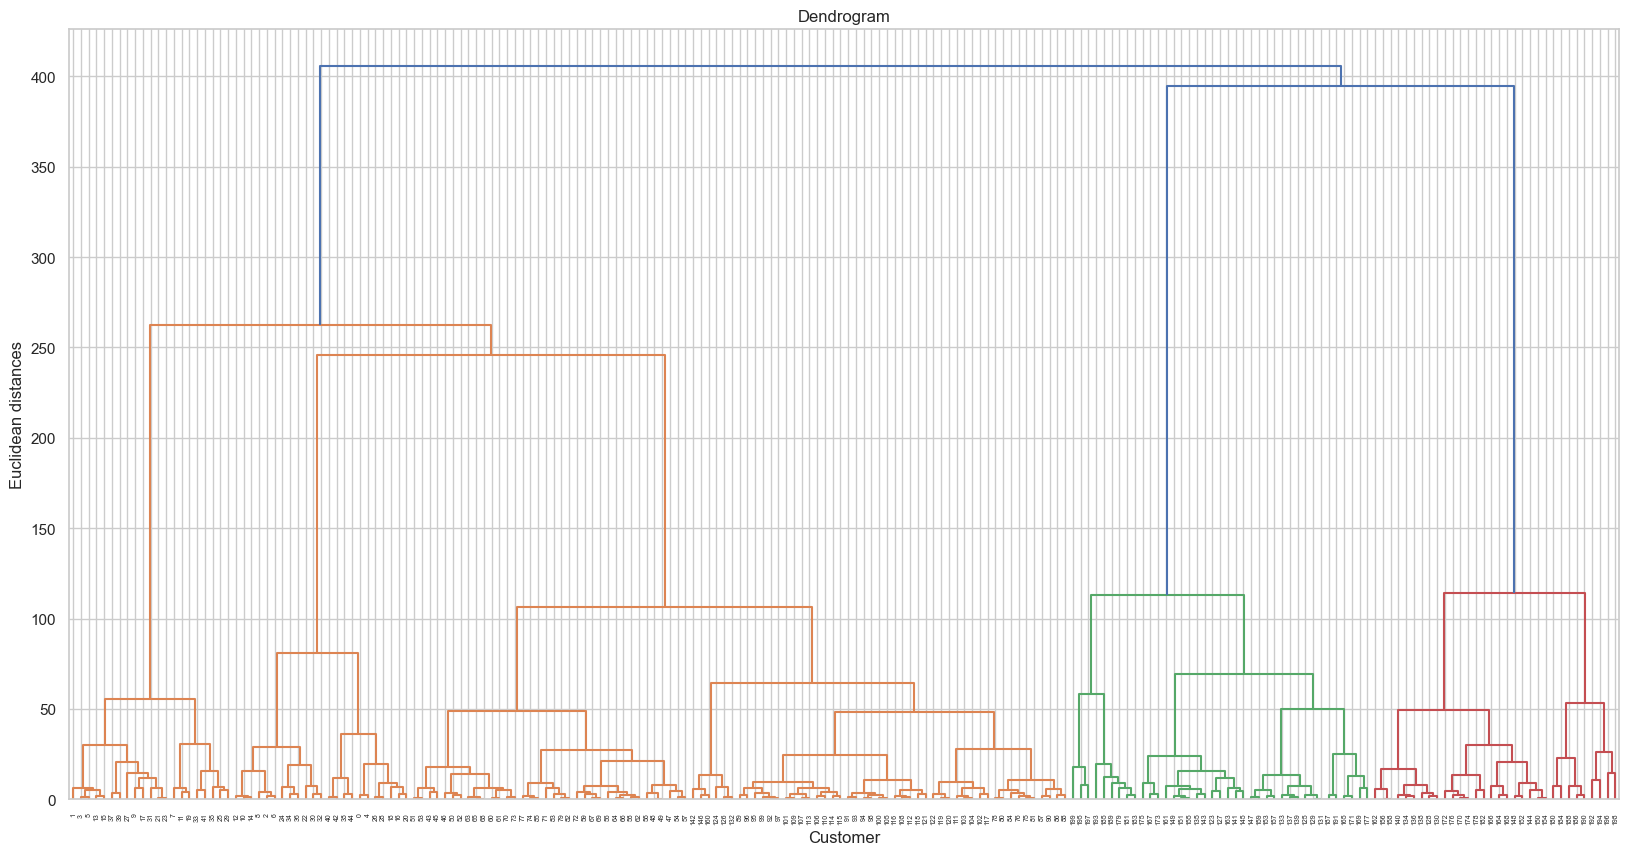

In [41]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customer")
plt.ylabel("Euclidean distances")

In [42]:
Agglomerative_Clustering=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [43]:
Agglomerative_Clustering.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [44]:
act = Agglomerative_Clustering.fit_predict(X)
act

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [45]:
Agglomerative_Clustering_Data = df.copy()
Agglomerative_Clustering_Data

CustomerID   Genre  Age  Annual_Income_$  Spending_Score Age Group
0             1    Male   19               15              39      0-20
1             2    Male   21               15              81     21-30
2             3  Female   20               16               6     21-30
3             4  Female   23               16              77     21-30
4             5  Female   31               17              40     31-40
..          ...     ...  ...              ...             ...       ...
195         196  Female   35              120              79     31-40
196         197  Female   45              126              28     41-50
197         198    Male   32              126              74     31-40
198         199    Male   32              137              18     31-40
199         200    Male   30              137              83     31-40

[200 rows x 6 columns]

In [46]:
Agglomerative_Clustering_Data['Cluster']=act
Agglomerative_Clustering_Data

CustomerID   Genre  Age  Annual_Income_$  Spending_Score Age Group  \
0             1    Male   19               15              39      0-20   
1             2    Male   21               15              81     21-30   
2             3  Female   20               16               6     21-30   
3             4  Female   23               16              77     21-30   
4             5  Female   31               17              40     31-40   
..          ...     ...  ...              ...             ...       ...   
195         196  Female   35              120              79     31-40   
196         197  Female   45              126              28     41-50   
197         198    Male   32              126              74     31-40   
198         199    Male   32              137              18     31-40   
199         200    Male   30              137              83     31-40   

     Cluster  
0          4  
1          3  
2          4  
3          3  
4          4  
..       ...  
195        2  
196        0  
197        2  
198        0  
199        2  

[200 rows x 7 columns]

<Axes: xlabel='Annual_Income_$', ylabel='Spending_Score'>

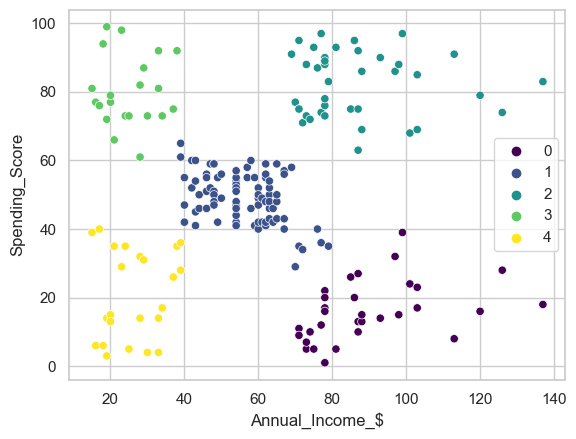

In [51]:
sns.scatterplot(x='Annual_Income_$', y='Spending_Score', hue=Agglomerative_Clustering.labels_, data=Agglomerative_Clustering_Data, palette='viridis')

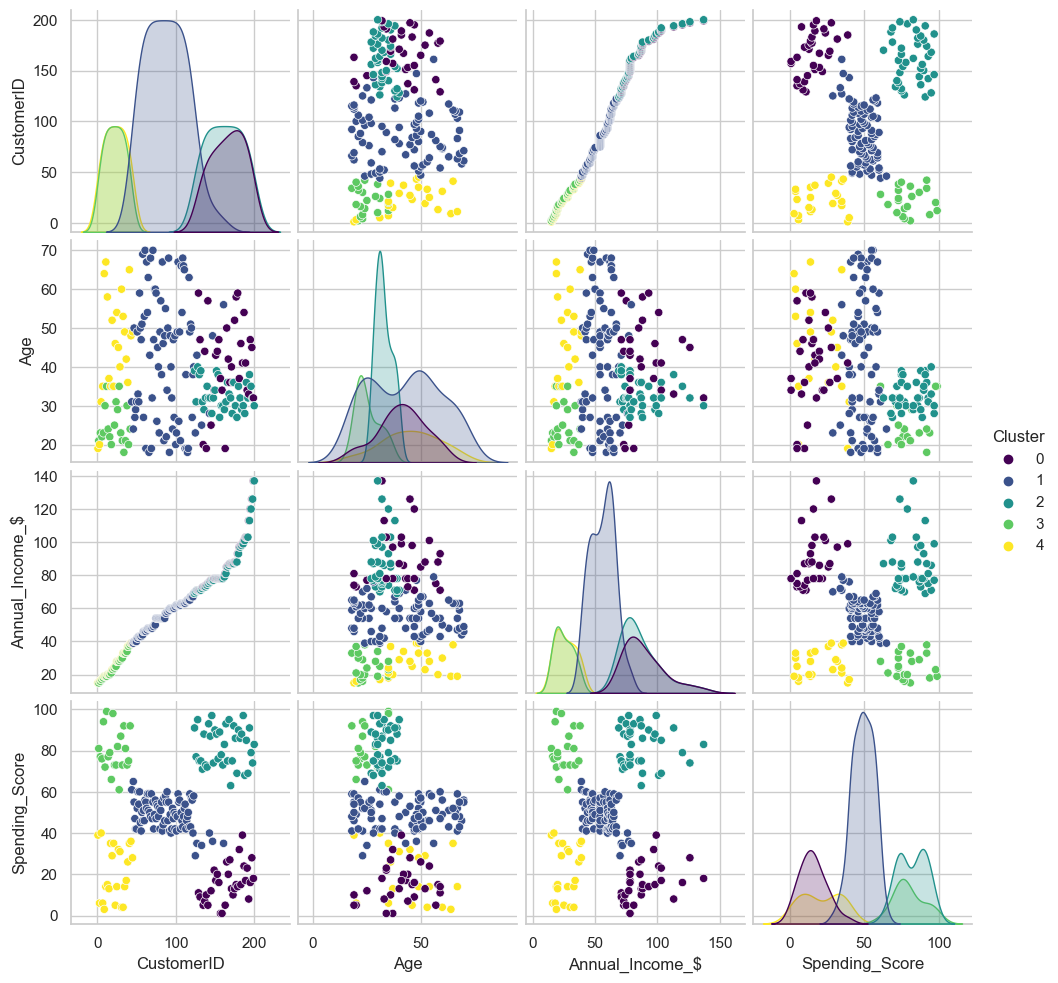

In [50]:
sns.pairplot(Agglomerative_Clustering_Data,hue='Cluster',palette='viridis')

## Cluster Analysis (K-Means)

### After building these different clusters, lets try to interpret them and look at the different customer segments.

In [53]:
#New Dataframe with number of cluster
b.head()

CustomerID   Genre  Age  Annual_Income_$  Spending_Score Age Group  Cluster
0           1    Male   19               15              39      0-20        3
1           2    Male   21               15              81     21-30        4
2           3  Female   20               16               6     21-30        3
3           4  Female   23               16              77     21-30        4
4           5  Female   31               17              40     31-40        3

In [54]:
b.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_$', 'Spending_Score',
       'Age Group', 'Cluster'],
      dtype='object')

In [55]:
c=b.groupby(['Cluster'])[['Annual_Income_$','Spending_Score','Age']].mean().reset_index()
c.head()

Cluster  Annual_Income_$  Spending_Score        Age
0        0        55.296296       49.518519  42.716049
1        1        86.538462       82.128205  32.692308
2        2        88.200000       17.114286  41.114286
3        3        26.304348       20.913043  45.217391
4        4        25.727273       79.363636  25.272727

Text(0, 0.5, 'Annual_Income')

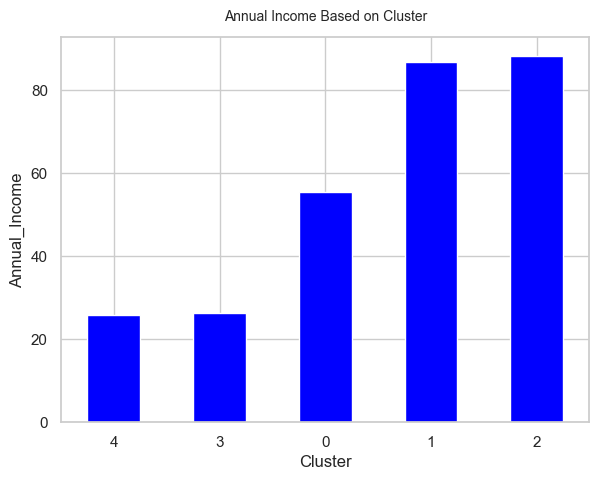

In [82]:
#visualize Annual Income based on Cluster
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = c.groupby('Cluster')['Annual_Income_$'].mean().sort_values(ascending = True).plot(kind = 'bar', color = 'blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Annual Income Based on Cluster', fontsize = 10, pad = 12)
plt.xlabel('Cluster')
plt.ylabel('Annual_Income')

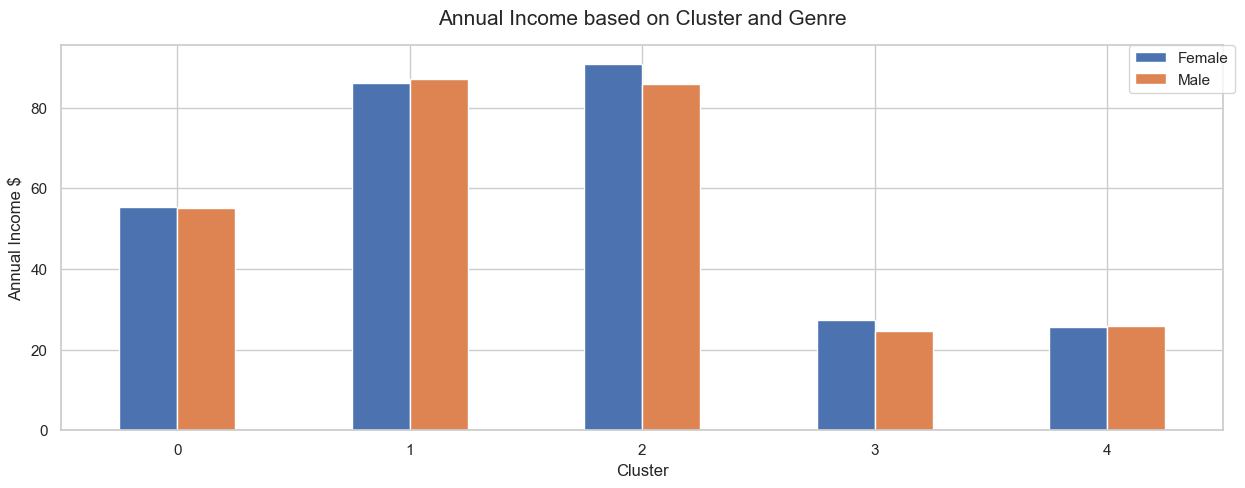

In [76]:
#visualize Annual Income based on Cluster and Genre
chart = b.groupby(['Cluster','Genre'])['Annual_Income_$'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Annual Income based on Cluster and Genre', fontsize = 15, pad = 15)
plt.xlabel('Cluster')
plt.ylabel('Annual Income $')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

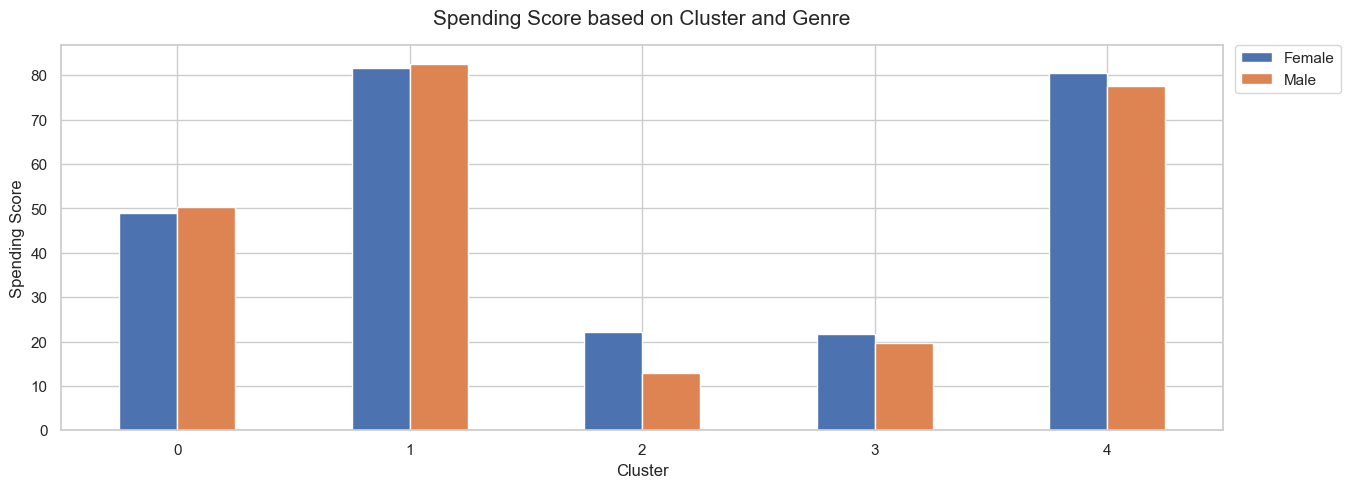

In [77]:
#visualize Annual Income based on Cluster and Genre
chart = b.groupby(['Cluster','Genre'])['Spending_Score'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Spending Score based on Cluster and Genre', fontsize = 15, pad = 15)
plt.xlabel('Cluster')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

Text(0, 0.5, 'Annual Income $')

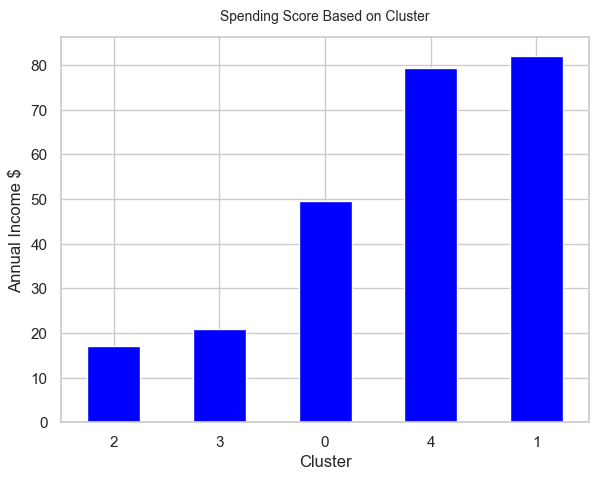

In [78]:
#visualize Spending Score based on Cluster
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = c.groupby('Cluster')['Spending_Score'].mean().sort_values(ascending = True).plot(kind = 'bar', color = 'blue')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Spending Score Based on Cluster', fontsize = 10, pad = 12)
plt.xlabel('Cluster')
plt.ylabel('Annual Income $')

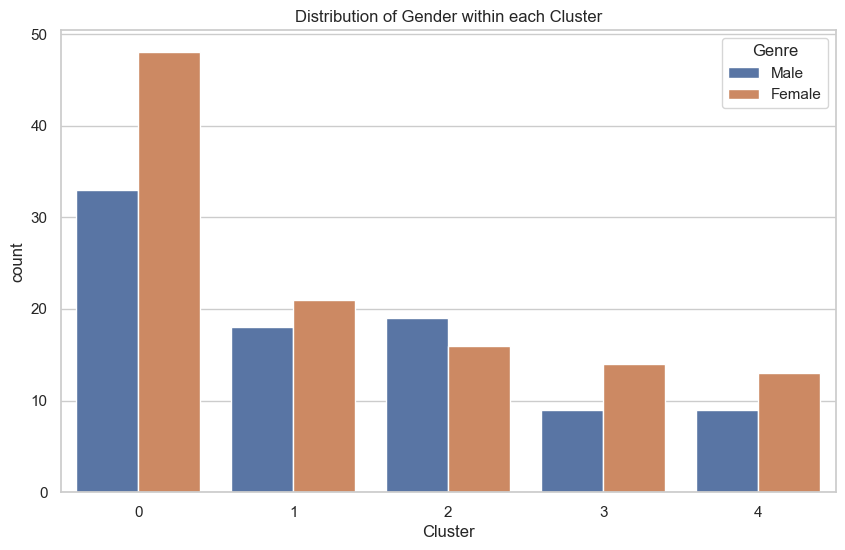

In [64]:
# Create a count plot to show the distribution of 'Gender' within each cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=b, x='Cluster', hue='Genre')

# Add a title to the plot
plt.title('Distribution of Gender within each Cluster')

# Display the plot
plt.show()

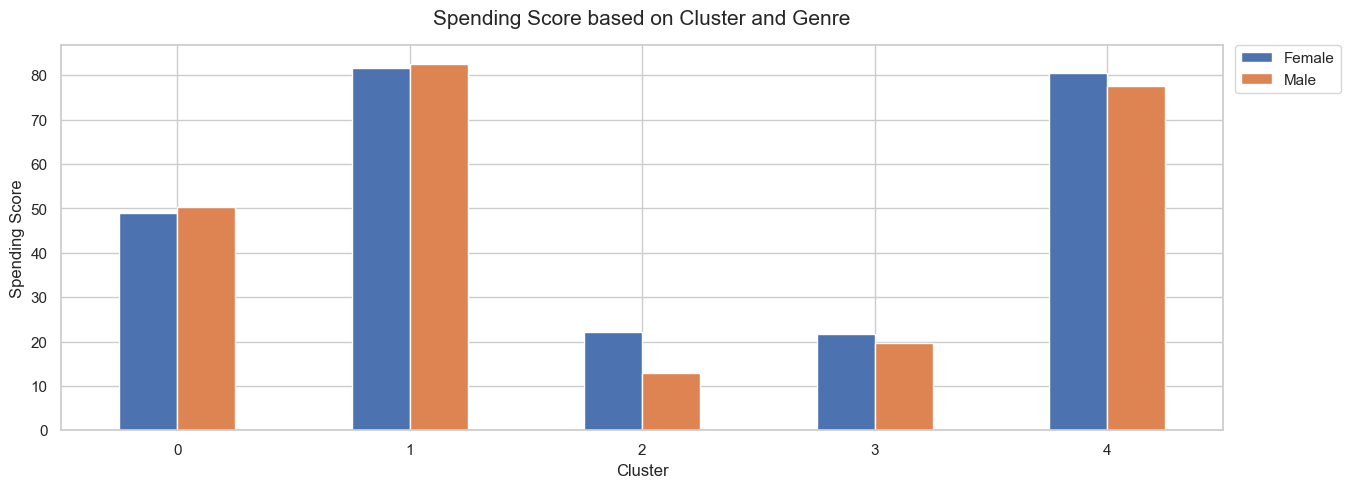

In [79]:
#visualize Annual Income based on Cluster and Genre
chart = b.groupby(['Cluster','Genre'])['Spending_Score'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Spending Score based on Cluster and Genre', fontsize = 15, pad = 15)
plt.xlabel('Cluster')
plt.ylabel('Spending Score')
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

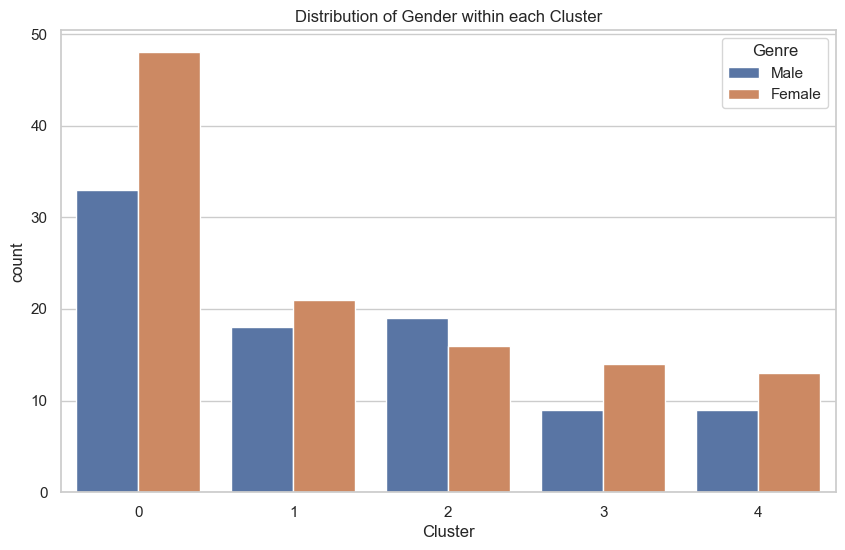

In [80]:
# Create a count plot to show the distribution of 'Gender' within each cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=b, x='Cluster', hue='Genre')

# Add a title to the plot
plt.title('Distribution of Gender within each Cluster')

# Display the plot
plt.show()

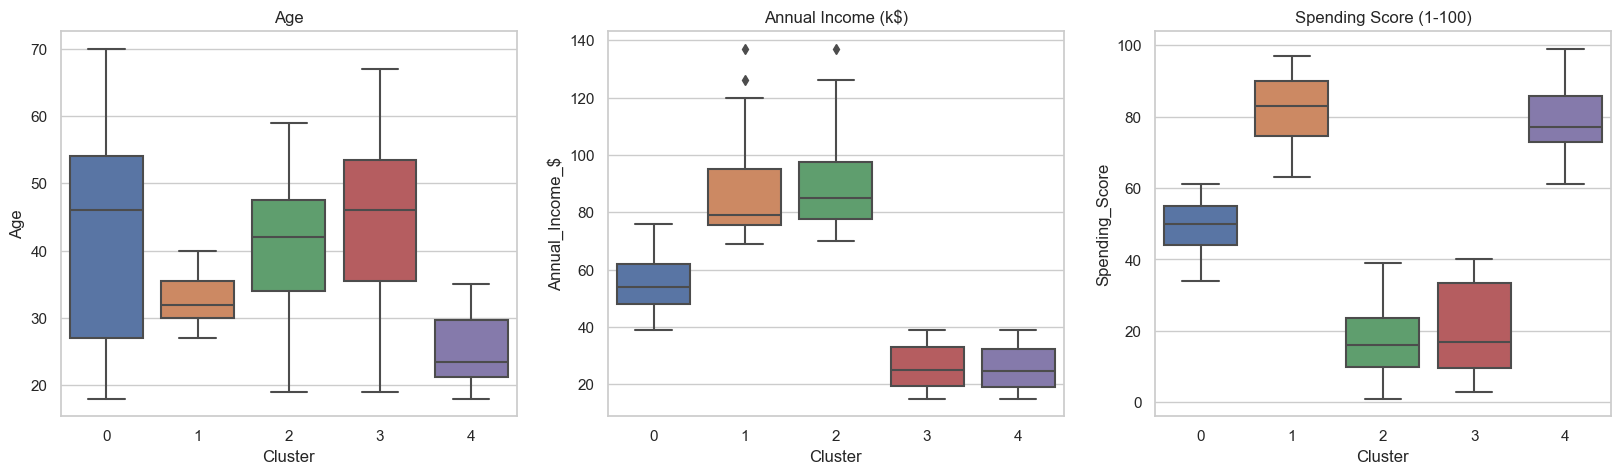

In [66]:
#create a boxplot for each feature split by 'Cluster'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Boxplot for 'Age'
sns.boxplot(data=b, x='Cluster', y='Age', ax=axs[0])
axs[0].set_title('Age')

# Boxplot for 'Annual Income (k$)'
sns.boxplot(data=b, x='Cluster', y='Annual_Income_$', ax=axs[1])
axs[1].set_title('Annual Income (k$)')

# Boxplot for 'Spending Score (1-100)'
sns.boxplot(data=b, x='Cluster', y='Spending_Score', ax=axs[2])
axs[2].set_title('Spending Score (1-100)')

# Display the plots
plt.show()